In [1]:
import matplotlib.pyplot as plt
import numpy as np

import json

In [2]:
# check ASR evaluation
datasets = ['hotpotqa', 'nq']
benign_sizes = {}
for name in datasets:
    with open(f"results/query_results/main/{name}-contriever-llama7b-Top5--M10x10-adv-LM_targeted-dot-5-5.json", "r") as f:
        result = json.loads(f.read())
        ASRs = []
        benign_sizes[name] = {}
        for indx, i in enumerate(result):
            poisoned_rate = 0
            for k in i.keys():
                for query in i[k]:
                    # print(query['output_poison'], query['incorrect_answer'], query['answer'])
                    if query['benign_size'] not in benign_sizes[name]:
                        benign_sizes[name][query['benign_size']] = {'p': 0, 'un_p': 0}
                    if query['incorrect_answer'].lower() in query['output_poison'].lower():
                        poisoned_rate += 1
                        benign_sizes[name][query['benign_size']]['p'] += 1
                    else:
                        benign_sizes[name][query['benign_size']]['un_p'] += 1
            ASRs.append(poisoned_rate/10)
        print(f'ASR of {name}: {sum(ASRs)/len(ASRs):.2f}')

ASR of hotpotqa: 0.98
ASR of nq: 0.97


In [3]:
benign_sizes

{'hotpotqa': {2: {'p': 98, 'un_p': 2}},
 'nq': {1: {'p': 82, 'un_p': 2},
  2: {'p': 13, 'un_p': 1},
  3: {'p': 2, 'un_p': 0}}}

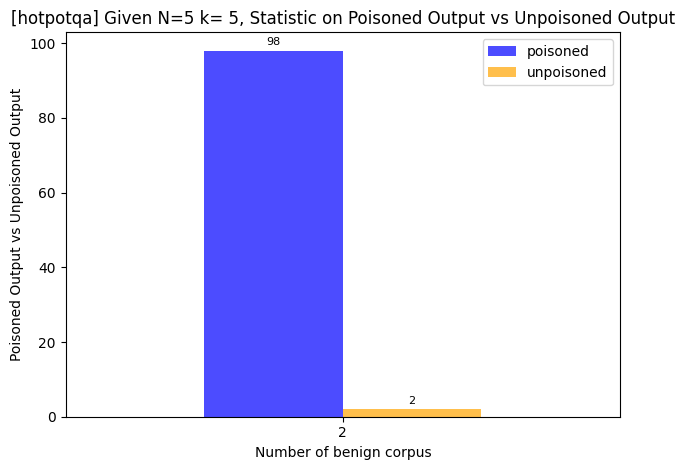

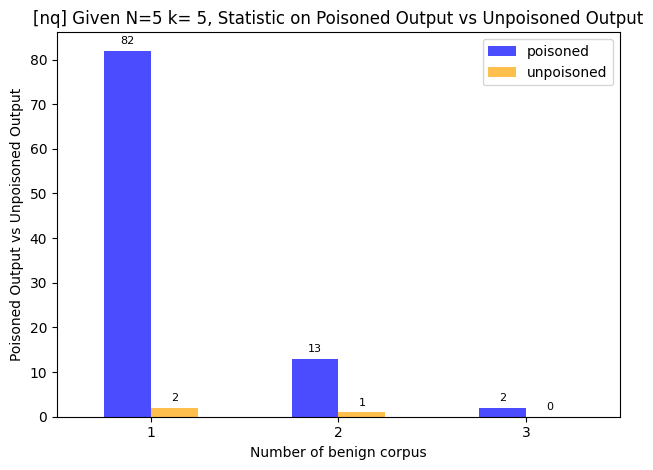

In [4]:
# Extract x, p, and un_p values

for dataset in benign_sizes:
    x = sorted(benign_sizes[dataset].keys())
    p_values = [benign_sizes[dataset][k]['p'] for k in x]
    un_p_values = [benign_sizes[dataset][k]['un_p'] for k in x]
    
    # Width of bars
    bar_width = 0.25
    
    # Bar positions
    x_indices = np.arange(len(x))
    p_positions = x_indices - bar_width / 2
    un_p_positions = x_indices + bar_width / 2
    
    # Plot bars
    fig, ax = plt.subplots(1,1)
    ax.bar(p_positions, p_values, width=bar_width, label='poisoned', color='blue', alpha=0.7)
    ax.bar(un_p_positions, un_p_values, width=bar_width, label='unpoisoned', color='orange', alpha=0.7)
    ax.set_xlim(-0.5, len(x)-0.5)
    
    for i, val in enumerate(p_values):
        plt.text(p_positions[i], val + 1, str(val), ha='center', va='bottom', fontsize=8)
    for i, val in enumerate(un_p_values):
        plt.text(un_p_positions[i], val + 1, str(val), ha='center', va='bottom', fontsize=8)
    
    # Labeling
    plt.xlabel('Number of benign corpus')
    plt.ylabel('Poisoned Output vs Unpoisoned Output')
    plt.title(f'[{dataset}] Given N=5 k= 5, Statistic on Poisoned Output vs Unpoisoned Output')
    plt.xticks(x_indices, x)
    plt.legend()
    
    # Display plot
    plt.tight_layout()
    plt.show()

Top-k = 4

N = 2

Balanced the number of benign text and adversary text, and the number of text taking into account for text generation. See how the ratio make a difference

In [5]:
# check ASR evaluation
datasets = ['hotpotqa', 'nq']
new_benign_sizes = {}
for name in datasets:
    with open(f"results/query_results/main/{name}-contriever-llama7b-Top4--M10x10-adv-LM_targeted-dot-2-4.json", "r") as f:
        result = json.loads(f.read())
        ASRs = []
        new_benign_sizes[name] = {}
        for indx, i in enumerate(result):
            poisoned_rate = 0
            for k in i.keys():
                for query in i[k]:
                    # print(query['output_poison'], query['incorrect_answer'], query['answer'])
                    if query['benign_size'] not in new_benign_sizes[name]:
                        new_benign_sizes[name][query['benign_size']] = {'p': 0, 'un_p': 0}
                    if query['incorrect_answer'].lower() in query['output_poison'].lower():
                        poisoned_rate += 1
                        new_benign_sizes[name][query['benign_size']]['p'] += 1
                    else:
                        new_benign_sizes[name][query['benign_size']]['un_p'] += 1
            ASRs.append(poisoned_rate/10)
        print(f'ASR of {name}: {sum(ASRs)/len(ASRs):.2f}')

ASR of hotpotqa: 0.95
ASR of nq: 0.94


In [6]:
new_benign_sizes

{'hotpotqa': {2: {'p': 95, 'un_p': 5}},
 'nq': {1: {'p': 79, 'un_p': 5},
  2: {'p': 13, 'un_p': 1},
  3: {'p': 2, 'un_p': 0}}}

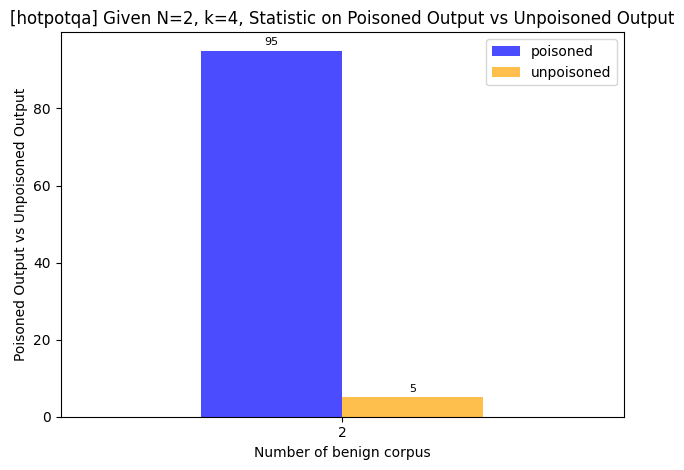

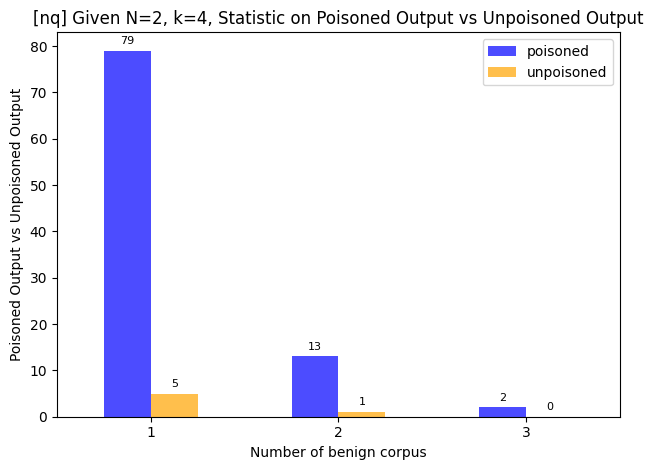

In [7]:
# Extract x, p, and un_p values
for dataset in new_benign_sizes:
    x = sorted(new_benign_sizes[dataset].keys())
    p_values = [new_benign_sizes[dataset][k]['p'] for k in x]
    un_p_values = [new_benign_sizes[dataset][k]['un_p'] for k in x]
    
    # Width of bars
    bar_width = 0.25
    
    # Bar positions
    x_indices = np.arange(len(x))
    p_positions = x_indices - bar_width / 2
    un_p_positions = x_indices + bar_width / 2
    
    
    fig, ax = plt.subplots(1,1)
    ax.bar(p_positions, p_values, width=bar_width, label='poisoned', color='blue', alpha=0.7)
    ax.bar(un_p_positions, un_p_values, width=bar_width, label='unpoisoned', color='orange', alpha=0.7)
    
    ax.set_xlim(-0.5, len(x)-0.5)
    
    for i, val in enumerate(p_values):
        plt.text(p_positions[i], val + 1, str(val), ha='center', va='bottom', fontsize=8)
    for i, val in enumerate(un_p_values):
        plt.text(un_p_positions[i], val + 1, str(val), ha='center', va='bottom', fontsize=8)
    
    # Labeling
    plt.xlabel('Number of benign corpus')
    plt.ylabel('Poisoned Output vs Unpoisoned Output')
    plt.title(f'[{dataset}] Given N=2, k=4, Statistic on Poisoned Output vs Unpoisoned Output')
    plt.xticks(x_indices, x)
    plt.legend()
    
    # Display plot
    plt.tight_layout()
    plt.show()

In [8]:
# check ASR evaluation
datasets = ['hotpotqa', 'nq']
benign_sizes = {}
for name in datasets:
    with open(f"results/query_results/main/{name}-contriever-llama7b-Top2--M10x10-adv-LM_targeted-dot-1-2.json", "r") as f:
        result = json.loads(f.read())
        ASRs = []
        benign_sizes[name] = {}
        for indx, i in enumerate(result):
            poisoned_rate = 0
            for k in i.keys():
                for query in i[k]:
                    # print(query['output_poison'], query['incorrect_answer'], query['answer'])
                    if query['benign_size'] not in benign_sizes[name]:
                        benign_sizes[name][query['benign_size']] = {'p': 0, 'un_p': 0}
                    if query['incorrect_answer'].lower() in query['output_poison'].lower():
                        poisoned_rate += 1
                        benign_sizes[name][query['benign_size']]['p'] += 1
                    else:
                        benign_sizes[name][query['benign_size']]['un_p'] += 1
            ASRs.append(poisoned_rate/10)
        print(f'ASR of {name}: {sum(ASRs)/len(ASRs):.2f}')

ASR of hotpotqa: 0.84
ASR of nq: 0.77


In [9]:
benign_sizes

{'hotpotqa': {2: {'p': 84, 'un_p': 16}},
 'nq': {1: {'p': 65, 'un_p': 19},
  2: {'p': 10, 'un_p': 4},
  3: {'p': 2, 'un_p': 0}}}

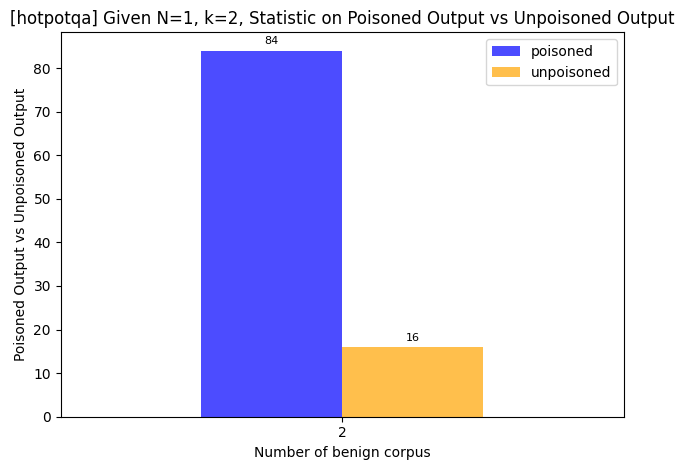

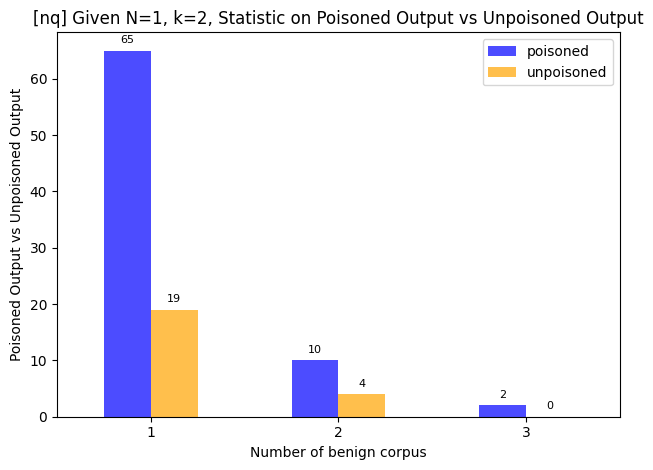

In [10]:
# Extract x, p, and un_p values
for dataset in benign_sizes:
    x = sorted(benign_sizes[dataset].keys())
    p_values = [benign_sizes[dataset][k]['p'] for k in x]
    un_p_values = [benign_sizes[dataset][k]['un_p'] for k in x]
    
    # Width of bars
    bar_width = 0.25
    
    # Bar positions
    x_indices = np.arange(len(x))
    p_positions = x_indices - bar_width / 2
    un_p_positions = x_indices + bar_width / 2
    
    fig, ax = plt.subplots(1,1)
    ax.bar(p_positions, p_values, width=bar_width, label='poisoned', color='blue', alpha=0.7)
    ax.bar(un_p_positions, un_p_values, width=bar_width, label='unpoisoned', color='orange', alpha=0.7)
    ax.set_xlim(-0.5, len(x)-0.5)
    
    for i, val in enumerate(p_values):
        plt.text(p_positions[i], val + 1, str(val), ha='center', va='bottom', fontsize=8)
    for i, val in enumerate(un_p_values):
        plt.text(un_p_positions[i], val + 1, str(val), ha='center', va='bottom', fontsize=8)
    
    # Labeling
    plt.xlabel('Number of benign corpus')
    plt.ylabel('Poisoned Output vs Unpoisoned Output')
    plt.title(f'[{dataset}] Given N=1, k=2, Statistic on Poisoned Output vs Unpoisoned Output')
    plt.xticks(x_indices, x)
    plt.legend()
    
    # Display plot
    plt.tight_layout()
    plt.show()